In [1]:
#TODO: update code for Lightning

# from google.colab import drive
# drive.mount('/content/drive')

# update folder name according to data 
# folder_training_data = "#14 Hi_ILY_nothnig wo facemesh"
# folder_training_data = DATA_PATH

# import sys
# sys.path.append('/content/drive/My Drive/Bootcamp/Final Project/exploring action recognition/models/'+folder_training_data)

# Sign Language Detection Project



In [2]:
# WARNING: updates of config may require restart of kernel if reload is unsuccessful
import config
# reload config without restarting the kernel
import importlib
importlib.reload(config)
from config import facemesh_included, actions, no_sequences, sequence_length, DATA_PATH, WEIGHTS_PATH, is_martin
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from model import create_model

import numpy as np
import os

In [3]:
# paths for keypoint files; update if needed
# X = np.load('/content/drive/MyDrive/Bootcamp/Final Project/exploring action recognition/models/#13 Hi_ILY_nothing/X.npy')
# y = np.load('/content/drive/MyDrive/Bootcamp/Final Project/exploring action recognition/models/#13 Hi_ILY_nothing/y.npy')
X = np.load(os.path.join(DATA_PATH,'X.npy'))
y = np.load(os.path.join(DATA_PATH,'y.npy'))

In [4]:
# training set size
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
# TODO: replace with train, validate and test split

# # Assuming 'data' is your dataset loaded as an array of shape [num_samples, num_features]
# np.random.shuffle(data)  # Shuffling the data to randomize input

# num_samples = data.shape[0]
# train_end = int(num_samples * 0.7)
# val_end = int(num_samples * 0.9)

# train_data = data[:train_end]
# val_data = data[train_end:val_end]
# test_data = data[val_end:]

# 7. Build and Train LSTM Neural Network

In [5]:
log_dir = os.path.join('Logs')

In [6]:
# OPTIONAL model() arguments
# available model_types: "LSTM", "Conv2D"
# tested activation functions: "tanh", "relu"; OTHERS: see below 
# tested activations for last neural layer: "softmax", "sigmoid"; OTHERS: "linear", "tanh", "relu", "softplus", "softsign", "selu", "elu", "exponential"
# neural multiplicator: multiply neurons per layer by this amount (default = 1); the higher NM, the longer the computation
# output will change according if facemesh_included = True or False

neural_multiplicator = 1 # used for naming of weights file, so only update number 
model = create_model(
    model_type = "LSTM", 
    act_funct = "tanh", 
    activation = "softmax", 
    neural_factor = neural_multiplicator, 
    metrics = ['categorical_accuracy', 'accuracy', 'Precision', 'Recall']
    )

# reLU = Rectified Linear Activation Function: returns 0 if it receives any negative input, but for any positive value x it returns that value back.  It helps the model to account for non-linearity.
# Sigmoid: Outputs a value between 0 and 1, making it suitable for binary classification or multilabel classification tasks where each label is predicted independently.

# Creating model by name

In [7]:
if is_martin:
    from model import build_which_model
    # build_which_model: 
    model_name = "model_1"
    model = build_which_model(model_name)

In [8]:
# EARLYSTOPPING
# Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', 
# and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is 
# no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, 
# model.stop_training is marked True and the training terminates.
# The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

# ARGUMENTS
# monitor: The metric to monitor. Default is "val_loss".
# min_delta: Min change in the monitored metric to be considered an improvement.
#            Any change less than this is not considered. Default is 0.
# patience: Epochs to wait for improvement before stopping. Default is 0.
# verbose: Verbosity mode, 0 is silent, 1 displays messages. Default is 0.
# mode: Defines when to stop training. Options are "auto", "min", "max".
#       "min" stops when decrease in metric ceases.
#       "max" stops when increase in metric ceases.
#       "auto" infers direction from the monitored metric. Default is "auto".
# baseline: Baseline value for comparison. Stops if no improvement over this.
#           Default is None.
# restore_best_weights: Restores weights from the best epoch if True.
#                       Uses last training weights if False. Default is False.
# start_from_epoch: Waits this many epochs before monitoring. Allows for warm-up.
#                   Default is 0.

# needs split of data into train, validation, and test (70/20/10%) sets to be used
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=0,
    write_graph=True,
    write_images=False,
    write_steps_per_second=False,
    update_freq="epoch",
    profile_batch=0,
    embeddings_freq=0,
    embeddings_metadata=None,
)

### Extra cell for training 😇 

In [9]:
# val_data = 
# hist = model.fit(X_train, y_train, epochs=2000, validation_data=val_data, callbacks=[early_stopping])
# model.fit(X_train, y_train, epochs=2000, callbacks=[early_stopping])

epochs = 100

hist = model.fit(X_train, y_train, epochs=epochs, callbacks=[tb_callback])

Epoch 1/10
5/5 [==============================] - 4s 19ms/step - loss: 1.9190 - categorical_accuracy: 0.1293
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 1.7558 - categorical_accuracy: 0.4218
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 1.5680 - categorical_accuracy: 0.5034
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 1.3655 - categorical_accuracy: 0.5918
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 1.1640 - categorical_accuracy: 0.5986
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 1.0628 - categorical_accuracy: 0.5986
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.8984 - categorical_accuracy: 0.7279
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.8239 - categorical_accuracy: 0.7143
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.8069 - categorical_accuracy: 0.7075
Epoch 10/10
5/5 [==

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_4 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 130471 (509.65 KB)
Trainable params: 130

## 7.5 Model performance visualizations

In [13]:
import seaborn as sns  
import matplotlib.pyplot as plt

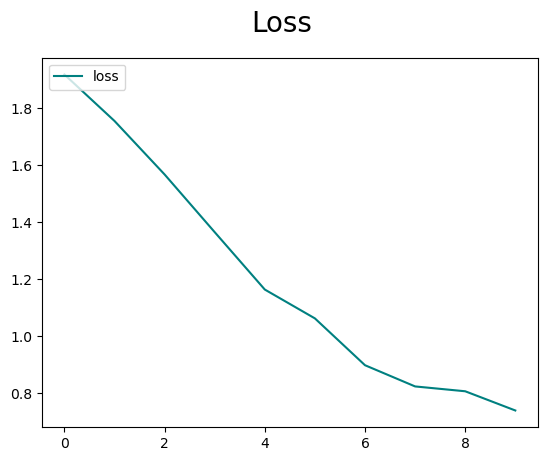

In [14]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [15]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'accuracy'

<Figure size 640x480 with 0 Axes>

## 8. Make predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

In [ ]:
actions[np.argmax(res[3])]

In [ ]:
actions[np.argmax(y_test[3])]

In [ ]:
# weights_name = "weights_wo_facemesh_LSTM_tanh_softmax_NM20_testsize0.3"
# model.load_weights(os.path.join(WEIGHTS_PATH, weights_name + ".keras"))

In [ ]:
len(X_test)

In [ ]:
res = model.predict(X_test)
correct_count = 0
for i in range(len(res)):
  prediction = actions[np.argmax(res[i])]
  actual = actions[np.argmax(res[i])]
  if prediction == actual:
    correct_count += 1
  # print("prediction: ", prediction)
  # print("actual    : ", actual)
  # print("~"*30)
print("~"*30)
print("accuracy on x_test: ", correct_count/len(res)*100, "%"
f"correct_count {correct_count}")

## 9. Save weights

In [ ]:
if facemesh_included == True:
    weights_name = f"weights_w_facemesh_{model_type}_{activation_function}_{activation}_NM{str(neural_multiplicator)}_testsize{test_size}"
elif facemesh_included == False:
    weights_name = f"weights_wo_facemesh_{model_type}_{activation_function}_{activation}_NM{str(neural_multiplicator)}_testsize{test_size}"
model.save(os.path.join(WEIGHTS_PATH, weights_name + ".keras"))

## 10. Evaluation using confusion matrix and accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_train)

In [ ]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

In [ ]:
accuracy_score??